In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

In [13]:
# Create Data
X, y = sklearn.datasets.make_circles(noise=0.2, factor=.2, random_state=1)

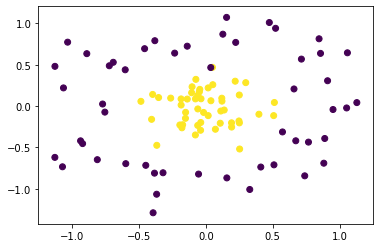

In [14]:
# Visualize Data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [17]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [20]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=1
)

Epoch 1/100
3/3 [==============================] - 0s 994us/step - loss: 0.8287 - accuracy: 0.4800
Epoch 2/100
3/3 [==============================] - 0s 997us/step - loss: 0.8237 - accuracy: 0.4800
Epoch 3/100
3/3 [==============================] - 0s 997us/step - loss: 0.8182 - accuracy: 0.4800
Epoch 4/100
3/3 [==============================] - 0s 996us/step - loss: 0.8140 - accuracy: 0.4533
Epoch 5/100
3/3 [==============================] - 0s 998us/step - loss: 0.8092 - accuracy: 0.4133
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8001 - accuracy: 0.3733
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7969 - accuracy: 0.3600
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.3733
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.3600
Epoch 11/100
3/3 [=

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [25]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [26]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [27]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=1
)

Epoch 1/100
3/3 [==============================] - 0s 996us/step - loss: 0.7140 - accuracy: 0.5200
Epoch 2/100
3/3 [==============================] - 0s 994us/step - loss: 0.7110 - accuracy: 0.5333
Epoch 3/100
3/3 [==============================] - 0s 997us/step - loss: 0.7085 - accuracy: 0.4933
Epoch 4/100
3/3 [==============================] - 0s 995us/step - loss: 0.7058 - accuracy: 0.4533
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.4267
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.3867
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4000
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4133
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4133
Epoch 11/100
3/3 [===

# Compare the models below

In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6191 - accuracy: 0.6400
Normal Neural Network - Loss: 0.6191431879997253, Accuracy: 0.6399999856948853


In [29]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5262 - accuracy: 0.8800
Deep Neural Network - Loss: 0.5262306928634644, Accuracy: 0.8799999952316284


# In a nutshell...

![stack more layers](../Images/stack-more-layers.jpg)